## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  39.821178   620.903498  0.280015  7.280238  1.345307
1  34.179423  1254.307112  0.538874  2.902232  1.539043
2  95.911011  1679.505413  0.843627  2.487427  1.353706
3  49.875791   147.554715  0.640457  8.734211  1.149507
4  38.280206  1116.072483  0.817581  1.238916  1.670233


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9793889	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9727296	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9663943	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9590968	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9539944	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9482043	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9405880	total: 60.7ms	remaining: 8.61s
7:	learn: 0.9345822	total: 61.2ms	remaining: 7.58s
8:	learn: 0.9264831	total: 61.6ms	remaining: 6.79s
9:	learn: 0.9174294	total: 62.1ms	remaining: 6.15s
10:	learn: 0.9105209	total: 62.7ms	remaining: 5.63s
11:	learn: 0.9045801	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8974192	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8903835	total: 63.8ms	remaining: 4.5s
14:	learn: 0.8831513	total: 64.3ms	remaining: 4.22s
15:	learn: 0.8763715	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8713465	total: 65.1ms	remaining: 3.77s
17:	learn: 0.8650706	total: 65.5ms	remaining: 3.58s
18:	learn: 0.8586008	total: 65.9ms	remaining: 

119:	learn: 0.4645219	total: 109ms	remaining: 796ms
120:	learn: 0.4620930	total: 109ms	remaining: 792ms
121:	learn: 0.4593637	total: 109ms	remaining: 788ms
122:	learn: 0.4569962	total: 110ms	remaining: 784ms
123:	learn: 0.4546371	total: 110ms	remaining: 779ms
124:	learn: 0.4520072	total: 111ms	remaining: 775ms
125:	learn: 0.4495177	total: 111ms	remaining: 771ms
126:	learn: 0.4466119	total: 112ms	remaining: 767ms
127:	learn: 0.4442910	total: 112ms	remaining: 763ms
128:	learn: 0.4418192	total: 112ms	remaining: 759ms
129:	learn: 0.4392346	total: 113ms	remaining: 755ms
130:	learn: 0.4371381	total: 113ms	remaining: 751ms
131:	learn: 0.4346862	total: 114ms	remaining: 748ms
132:	learn: 0.4330228	total: 114ms	remaining: 743ms
133:	learn: 0.4307761	total: 114ms	remaining: 740ms
134:	learn: 0.4282899	total: 115ms	remaining: 735ms
135:	learn: 0.4269622	total: 115ms	remaining: 731ms
136:	learn: 0.4244938	total: 116ms	remaining: 728ms
137:	learn: 0.4221158	total: 116ms	remaining: 724ms
138:	learn: 

303:	learn: 0.2345898	total: 185ms	remaining: 424ms
304:	learn: 0.2343008	total: 186ms	remaining: 424ms
305:	learn: 0.2337999	total: 186ms	remaining: 423ms
306:	learn: 0.2335096	total: 187ms	remaining: 422ms
307:	learn: 0.2332266	total: 187ms	remaining: 421ms
308:	learn: 0.2321937	total: 188ms	remaining: 420ms
309:	learn: 0.2311543	total: 188ms	remaining: 418ms
310:	learn: 0.2302720	total: 188ms	remaining: 417ms
311:	learn: 0.2299845	total: 189ms	remaining: 416ms
312:	learn: 0.2285672	total: 189ms	remaining: 415ms
313:	learn: 0.2282932	total: 189ms	remaining: 413ms
314:	learn: 0.2280271	total: 190ms	remaining: 412ms
315:	learn: 0.2277735	total: 190ms	remaining: 411ms
316:	learn: 0.2274937	total: 190ms	remaining: 410ms
317:	learn: 0.2272310	total: 191ms	remaining: 409ms
318:	learn: 0.2266036	total: 191ms	remaining: 408ms
319:	learn: 0.2256527	total: 191ms	remaining: 407ms
320:	learn: 0.2245513	total: 192ms	remaining: 406ms
321:	learn: 0.2234617	total: 192ms	remaining: 404ms
322:	learn: 

543:	learn: 0.1148463	total: 291ms	remaining: 244ms
544:	learn: 0.1146314	total: 291ms	remaining: 243ms
545:	learn: 0.1142908	total: 292ms	remaining: 243ms
546:	learn: 0.1138527	total: 292ms	remaining: 242ms
547:	learn: 0.1135219	total: 293ms	remaining: 241ms
548:	learn: 0.1130502	total: 293ms	remaining: 241ms
549:	learn: 0.1127388	total: 293ms	remaining: 240ms
550:	learn: 0.1124333	total: 294ms	remaining: 239ms
551:	learn: 0.1119722	total: 294ms	remaining: 239ms
552:	learn: 0.1116523	total: 294ms	remaining: 238ms
553:	learn: 0.1113238	total: 295ms	remaining: 237ms
554:	learn: 0.1108753	total: 295ms	remaining: 237ms
555:	learn: 0.1106216	total: 296ms	remaining: 236ms
556:	learn: 0.1103919	total: 296ms	remaining: 236ms
557:	learn: 0.1101472	total: 297ms	remaining: 235ms
558:	learn: 0.1099256	total: 297ms	remaining: 234ms
559:	learn: 0.1096896	total: 297ms	remaining: 234ms
560:	learn: 0.1094758	total: 298ms	remaining: 233ms
561:	learn: 0.1092482	total: 298ms	remaining: 232ms
562:	learn: 

715:	learn: 0.0769166	total: 367ms	remaining: 146ms
716:	learn: 0.0766768	total: 368ms	remaining: 145ms
717:	learn: 0.0765152	total: 368ms	remaining: 145ms
718:	learn: 0.0763323	total: 369ms	remaining: 144ms
719:	learn: 0.0761753	total: 370ms	remaining: 144ms
720:	learn: 0.0758742	total: 370ms	remaining: 143ms
721:	learn: 0.0757206	total: 370ms	remaining: 143ms
722:	learn: 0.0754740	total: 371ms	remaining: 142ms
723:	learn: 0.0752913	total: 371ms	remaining: 141ms
724:	learn: 0.0750491	total: 371ms	remaining: 141ms
725:	learn: 0.0748995	total: 372ms	remaining: 140ms
726:	learn: 0.0746086	total: 372ms	remaining: 140ms
727:	learn: 0.0744622	total: 372ms	remaining: 139ms
728:	learn: 0.0742264	total: 373ms	remaining: 139ms
729:	learn: 0.0740491	total: 373ms	remaining: 138ms
730:	learn: 0.0738174	total: 374ms	remaining: 138ms
731:	learn: 0.0736748	total: 374ms	remaining: 137ms
732:	learn: 0.0733937	total: 375ms	remaining: 136ms
733:	learn: 0.0732541	total: 375ms	remaining: 136ms
734:	learn: 

961:	learn: 0.0432789	total: 473ms	remaining: 18.7ms
962:	learn: 0.0431632	total: 473ms	remaining: 18.2ms
963:	learn: 0.0431125	total: 474ms	remaining: 17.7ms
964:	learn: 0.0429990	total: 474ms	remaining: 17.2ms
965:	learn: 0.0428853	total: 474ms	remaining: 16.7ms
966:	learn: 0.0428356	total: 475ms	remaining: 16.2ms
967:	learn: 0.0426714	total: 475ms	remaining: 15.7ms
968:	learn: 0.0425602	total: 475ms	remaining: 15.2ms
969:	learn: 0.0424000	total: 476ms	remaining: 14.7ms
970:	learn: 0.0423253	total: 476ms	remaining: 14.2ms
971:	learn: 0.0422159	total: 476ms	remaining: 13.7ms
972:	learn: 0.0421057	total: 477ms	remaining: 13.2ms
973:	learn: 0.0419508	total: 477ms	remaining: 12.7ms
974:	learn: 0.0418654	total: 478ms	remaining: 12.2ms
975:	learn: 0.0417606	total: 478ms	remaining: 11.8ms
976:	learn: 0.0416583	total: 478ms	remaining: 11.3ms
977:	learn: 0.0415509	total: 479ms	remaining: 10.8ms
978:	learn: 0.0414575	total: 479ms	remaining: 10.3ms
979:	learn: 0.0413687	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

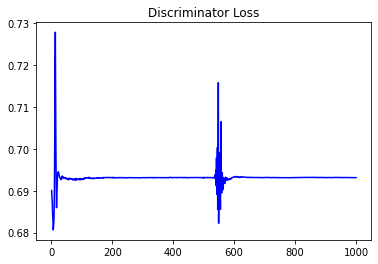

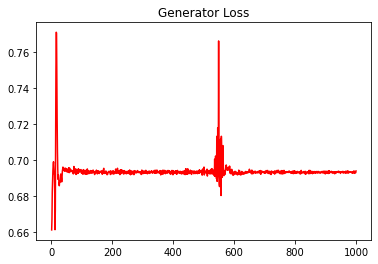

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6497474088029326


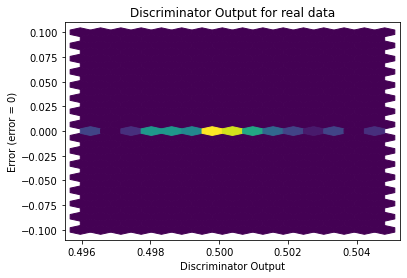

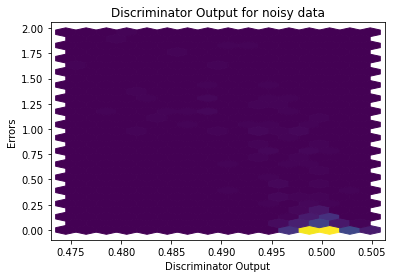

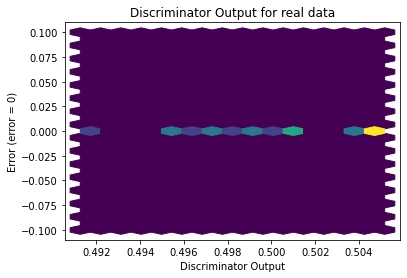

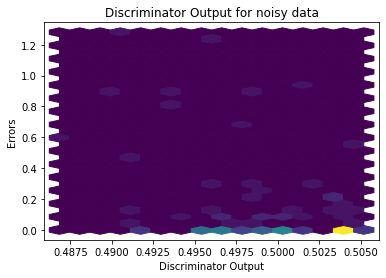

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


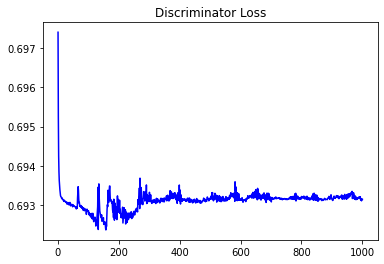

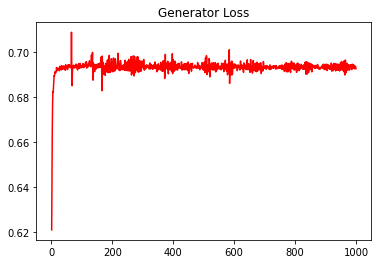

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6679411504251251


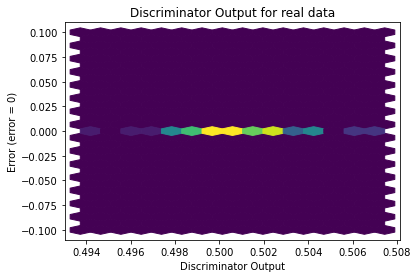

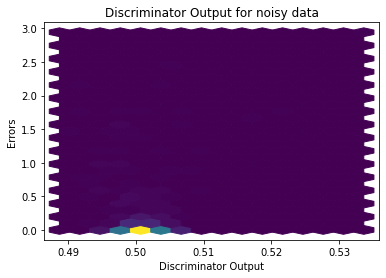

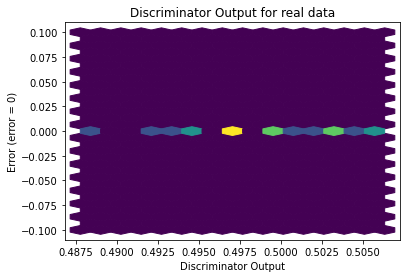

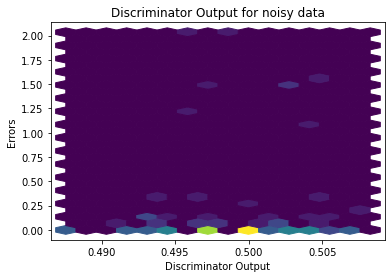

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0537]], requires_grad=True)
